In [4]:
import multiprocessing
from typing import Sequence, Type
import tensorflow as tf
from tensorflow.python.keras.layers.pooling import Pooling2D

from smot.jupyter import model_reports
from smot.problems.mnist.LeNet5 import lenet5_lib

In [5]:
# Load (and cache) standard MNIST dataset.
(x_train, y_train), (x_test, y_test) = lenet5_lib.load_LeNet5_datasets()

Model: "LeNet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 40)        20040     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 40)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 60)          60060     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 60)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 80)          12008

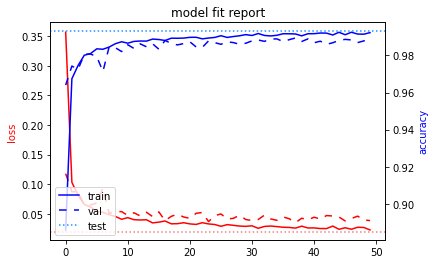

In [6]:

model = tf.keras.models.Sequential(
    name="LeNet5",
    layers=[
        tf.keras.layers.Conv2D(
            filters=20,
            kernel_size=5,
            input_shape=lenet5_lib.INPUT_SHAPE,
            strides=1,
            padding="same",
            activation="tanh",
        ),  # C1
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(
            filters=40,
            kernel_size=5,
            strides=1,
            activation="tanh",
            padding="same",
        ),  # C3
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(
            filters=60,
            kernel_size=5,
            strides=1,
            activation="tanh",
            padding="same",
        ),  # C3
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(
            filters=80,
            kernel_size=5,
            strides=1,
            activation="tanh",
            padding="same",
        ),  # C3
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Flatten(),  # Flatten
        #tf.keras.layers.Dense(100, activation="tanh"),  # C5
       # tf.keras.layers.Dense(120, activation="tanh"),  # C5
        tf.keras.layers.Dense(150, activation="tanh"),  # C5
        tf.keras.layers.Dense(10, activation="softmax"),  # Output layer
    ],
)

model.compile(
    optimizer='adam',
    # Needed for the categorical softmax layer.
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
)

# Print the model summary.
model.summary()

batch_size = 128
validation_split = 0.2
epochs = 50

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    validation_split=validation_split,
)
datagen.fit(x_train)

training_generator = datagen.flow(
    x_train,
    y_train,
    subset="training",
    batch_size=batch_size,
)
validation_generator = datagen.flow(
    x_train,
    y_train,
    subset="validation",
    batch_size=batch_size,
)

history = model.fit(
    training_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1,
    use_multiprocessing=True,
    workers=12,
)

# Evaluate the model with the test data.
test_loss, test_accuracy = model_reports.model_fit_report(
    model=model,
    history=history,
    test_data=(x_test, y_test),
)